In [16]:
 # These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from gempy.plot import visualization_2d_pro as vv

## Model interpolation

In [18]:
# Data Preparation
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[10,10,10], 
                        path_o = path_to_data + "model5_orientations.csv",
                        path_i = path_to_data + "model5_surface_points.csv") 

Active grids: ['regular']


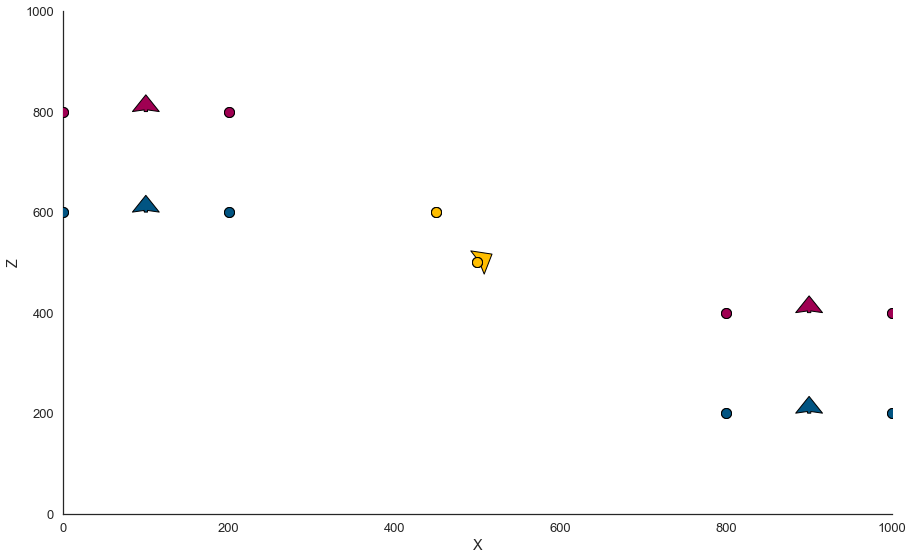

In [19]:
gp.plot.plot_data(geo_data)

[ 800. 1000.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 50.        ,  50.        ,  50.        ],
       [ 50.        ,  50.        , 150.        ],
       [ 50.        ,  50.        , 250.        ],
       ...,
       [750.        , 950.        , 913.36098756],
       [850.        , 950.        , 896.96670002],
       [950.        , 950.        , 861.0736088 ]])

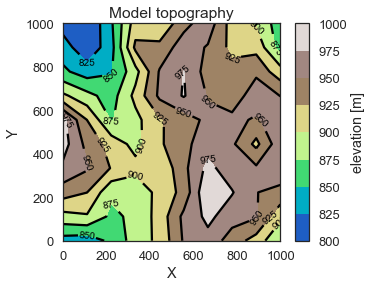

In [20]:
geo_data.set_topography()

In [21]:
section_dict = {'section1':([0,0],[1000,1000],[100,80]),
                 'section2':([800,0],[800,1000],[150,100]),
                 'section3':([50,200],[100,500],[200,150])} 

In [22]:

geo_data.set_section_grid(section_dict)

Active grids: ['regular' 'topography' 'sections']


Grid Object. Values: 
array([[  50.        ,   50.        ,   50.        ],
       [  50.        ,   50.        ,  150.        ],
       [  50.        ,   50.        ,  250.        ],
       ...,
       [ 100.        ,  500.        ,  986.57718121],
       [ 100.        ,  500.        ,  993.2885906 ],
       [ 100.        ,  500.        , 1000.        ]])

In [23]:
geo_data.grid.sections

,start,stop,resolution,dist
section1,"[0, 0]","[1000, 1000]","[100, 80]",1414.213562
section2,"[800, 0]","[800, 1000]","[150, 100]",1000.000000
section3,"[50, 200]","[100, 500]","[200, 150]",304.138127


In [24]:
gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [25]:
gp.map_series_to_surfaces(geo_data, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')})
geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False
Basement,False,False


In [26]:
geo_data.grid.active_grids

array([ True, False,  True,  True, False])

In [27]:
gp.compute_model(geo_data);

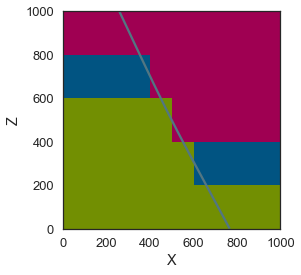

In [28]:
gp.plot.plot_section(geo_data, 0)

/anaconda3/envs/gempy/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '
../../gempy/plot/visualization_2d.py:200: UserWarning: the orientations are not converted to apparent dip.
  warnings.warn('the orientations are not converted to apparent dip.')


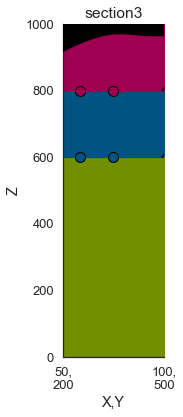

In [29]:
gp.plot.plot_section_by_name(geo_data, 'section3', show_all_data=True)

### Plot2d-Pro: Granular interface:

0.7071067811865475
1.0
1.0


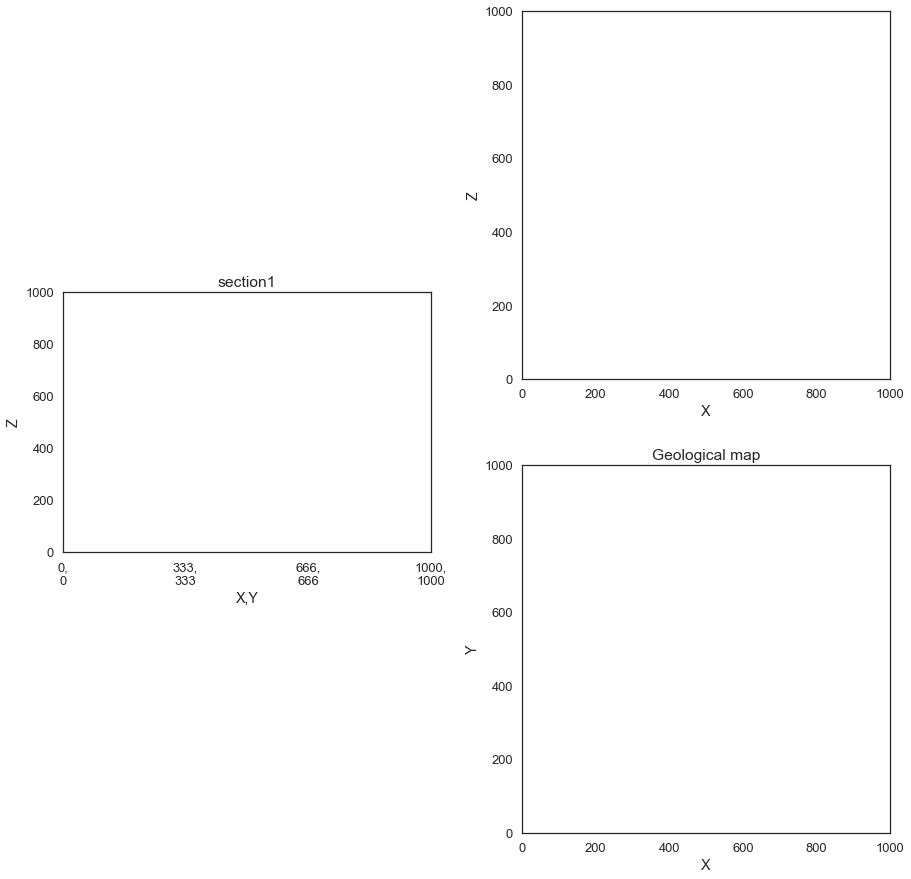

In [37]:
from importlib import reload
reload(vv)
p = vv.Plot2D(geo_data)
p.create_figure((13, 13))
#p.fig.show()

sec_name = 'section1'
sec_name_2 = 'section1'

# Create the section. This loacte the axes and give the right
# aspect ratio and labels

a = p.add_section(sec_name, ax_pos=121)
b = p.add_section(cell_number=3, ax_pos=222)
t = p.add_section('topography', ax_pos= 224)

In [40]:
# Axes 0
p.plot_contacts(a, sec_name)
p.plot_lith(a, sec_name)
p.plot_data(a, sec_name, projection_distance=200)
p.plot_topography(a, sec_name)

# # Axes 1
p.plot_contacts(b, cell_number=3)
p.plot_lith(b, cell_number=3)
p.plot_scalar_field(b, cell_number=3, sn=1)
p.plot_topography(b, cell_number=2)

# #axes2.
p.plot_lith(t, 'topography')
p.plot_scalar_field(t, 'topography', sn=1)
p.plot_data(t, 'topography')
p.plot_contacts(t, 'topography')
#p.fig.tight_layout()

p1 [0.0, 200.0] p2 [1000.0, 200.0]


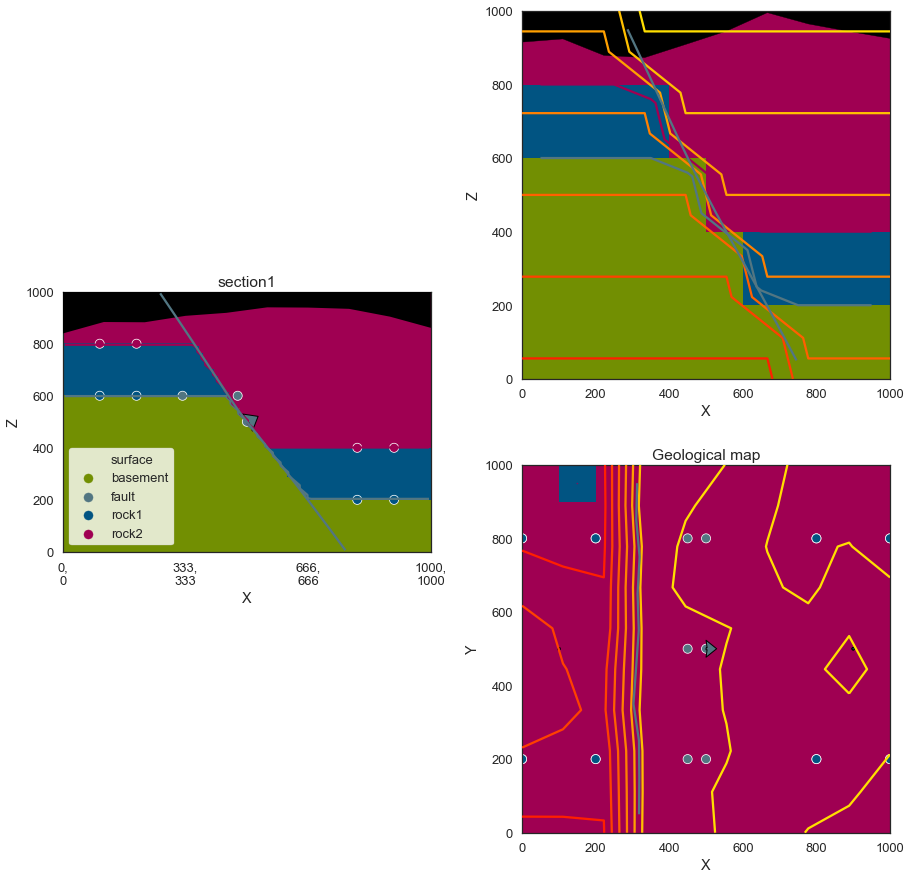

In [42]:
p.fig

##### Plotting traces:

In [ ]:
from importlib import reload
reload(vv)
p = vv.Plot2D(geo_data)
p.create_figure((13, 13))
#p.fig.show()

In [ ]:
a1 = p.add_section('topography')
p.plot_section_traces(a1)


In [ ]:
p.fig

### Plot API

In [ ]:
from gempy.plot import plot_api as pa
from importlib import reload
reload(pa)

In [ ]:
pa.plot_2d(geo_data)